# Soal 2 - EDA (Exploratory Data Analysis) Real Estate 

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# menampilkan csv ke dalam dataframe
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# cek dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
# cek jumlah NaN
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# drop Null Value
df = df.dropna()

# 1. 

In [13]:
# menampilkan kolom 'Landsize' dan 'Price'
df[['Landsize','Price']].head()

,Landsize,Price
1,156.0,1035000.0
2,134.0,1465000.0
4,120.0,1600000.0
6,245.0,1876000.0
7,256.0,1636000.0


In [ ]:
# CENTRAL TENDENCY

In [14]:
# mean atau rata-rata
df[['Landsize','Price']].mean()

Landsize    4.710069e+02
Price       1.068828e+06
dtype: float64

In [15]:
# median atau nilai tengah
df[['Landsize','Price']].median()

Landsize       373.0
Price       880000.0
dtype: float64

In [16]:
# modus atau nilai yang paling sering muncul
df[['Landsize','Price']].mode()

,Landsize,Price
0,0.0,600000.0


In [ ]:
# DISPERSION

In [17]:
# Variance
df[['Landsize','Price']].var()

Landsize    8.054163e+05
Price       4.558362e+11
dtype: float64

In [18]:
# Standard deviasi
df[['Landsize','Price']].std()

Landsize       897.449881
Price       675156.427502
dtype: float64

Landsize:
- mean = 471.006
- std = 897.449

Ini menunjukkan Landsize atau luas lahan memiliki standard deviasi yang relatif besar karena hampir dua kali dari nilai rata-ratanya.

Price
- mean = 1068828
- std = 675156.427

Ini menunjukkan Price atau harga rumah memiliki standard deviasi yang relatif besar karena sampai 0.6 kali dari nilai rata-ratanya.

In [ ]:
# DISTRIBUTION

In [19]:
# skewness
stats.skew(df[['Landsize','Price']])

# skewness Landsize positif, berarti banyak pencilan di atas rata-rata
# skewness Price positif, berarti banyak pencilan di atas rata-rata

array([18.83437856,  2.47478995])

In [20]:
# skewtest
stats.skewtest(df[['Landsize','Price']])

# pvalue Landsize <0.05, berarti distribusi tidak normal
# pvalue Price <0.05, berarti distribusi tidak normal

SkewtestResult(statistic=array([100.80212831,  48.06846705]), pvalue=array([0., 0.]))

In [21]:
# kurtosis
stats.kurtosis(df[['Landsize','Price']])

# kurtosis Landsize leptokurtic
# kurtosis Price leptokurtic

array([572.53006674,  12.22248931])

In [22]:
# kurtosis test
stats.kurtosistest(df[['Landsize','Price']])

# pvalue Landsize <0.05, berarti distribusi tidak normal
# pvalue Price <0.05, berarti distribusi tidak normal

KurtosistestResult(statistic=array([56.11147228, 34.81096659]), pvalue=array([0.00000000e+000, 1.65997904e-265]))

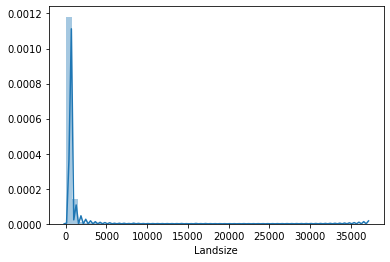

In [24]:
# menapilkan distribution plot untuk landsize
sns.distplot(df['Landsize'])

# bisa dilihat distribusi tidak normal, sesuai dengan nilai rata-rata di 471, dan banyak pencilan di atas rata-rata

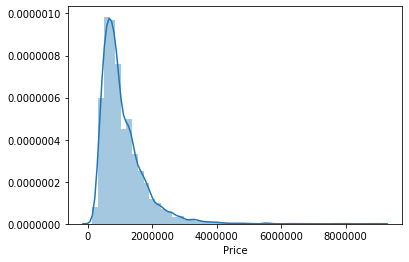

In [25]:
# menapilkan distribution plot untuk landsize
sns.distplot(df['Price'])

# bisa dilihat distribusi tidak normal, sesuai dengan nilai rata-rata di 1068828, dan banyak pencilan di atas rata-rata

# 2.

In [26]:
# menampilkan kolom 'Distance'
df['Distance'].head()

1    2.5
2    2.5
4    2.5
6    2.5
7    2.5
Name: Distance, dtype: float64

In [30]:
# membuat fungsi untuk mencari jumlaj outliers
def outliers(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3-q1

    lower_whisker = kolom < (q1 - 1.5*iqr)
    upper_whisker = kolom > (q3 + 1.5*iqr)

    outliers = (lower_whisker | upper_whisker).sum()
    return outliers

# jumlah outliers pada kolom 'Distance'
outliers(df['Distance'])

204

In [35]:
# Batas atas untuk outliers
def upper_whisker(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3-q1
    
    upper_whisker = q3 + 1.5*iqr
    return upper_whisker 

upper_whisker(df['Distance'])

22.15

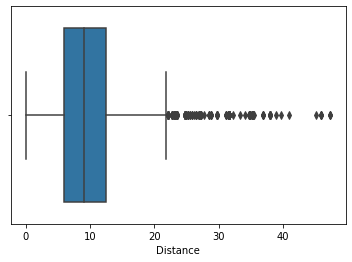

In [31]:
# menampilkan boxplot untuk melihat outliers
sns.boxplot(df['Distance'])

# dari boxplot di bawah, dapat kita lihat banyak outliers di atas angka 22.15, dengan kata lain jika jarak ke CBD di atas 22.15 km dianggap sangat jauh.

# 3. 

In [53]:
outliers(df['YearBuilt'])

2

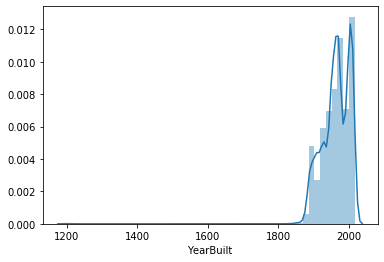

In [56]:
# menampilkan distribution plot untuk kolom YearBuilt
sns.distplot(df['YearBuilt'])

#  dapat terlihat distribusinya tidak normal, terdapat pencilan di bawah nilai Rata-rata.
# skewness negatif
# terdapat 2 puncakan, di mana data banyak terdistribusi di sekitar tahun 1960-1970 dan 1995-2010

# 4.

In [61]:
# menampilkan jumlah rumah yg dibangun pada tahun tertentu
count_YearBuilt = df.groupby('YearBuilt').count()['Type']
count_YearBuilt

# kemungkinan 1196 adalah typo

YearBuilt
1196.0     1
1830.0     1
1850.0     3
1854.0     1
1856.0     1
          ..
2014.0    82
2015.0    50
2016.0    50
2017.0    10
2018.0     1
Name: Type, Length: 135, dtype: int64

In [50]:
# menghapus data yg typo
df_YearBuilt = df[df['YearBuilt'] != 1196.0]

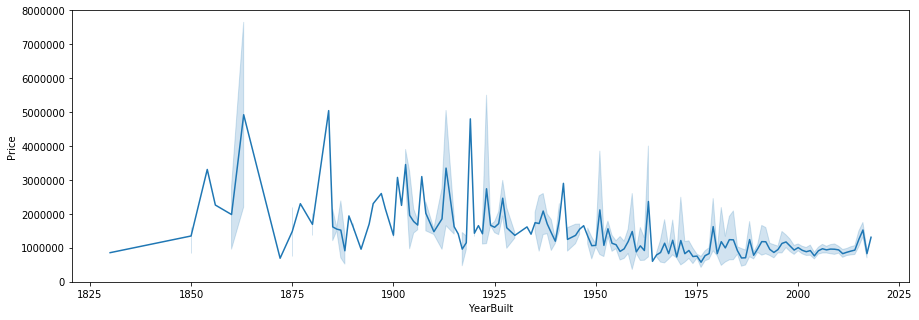

In [51]:
# menampilkan lineplot perkembangan harga dari tahun ke tahun
plt.figure(figsize=(15,5))

sns.lineplot(x='YearBuilt', y='Price', data=df_YearBuilt)

# harga cukup fluktuatif, namun cenderung menurun terutama sejak tahun 1925

# 5.

In [64]:
# Normal test untuk mengetahui distribusinya normal atau tidak
stats.normaltest(df['Price'])

# pvalue<0.05 berarti distribusinya tidak normal

NormaltestResult(statistic=3522.3809188140385, pvalue=0.0)

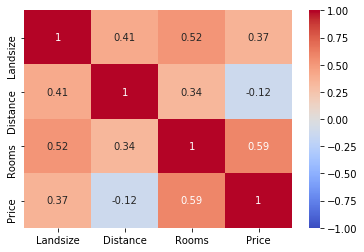

In [63]:
# menampilkan heatmap untuk korelasi antar kolom yang dibutuhkan

sns.heatmap(df[['Landsize','Distance','Rooms','Price']].corr(method='spearman'), cmap='coolwarm', annot=True, vmin=-1, vmax=1,)

# metode korelasi menggunakan spearman karena distribusinya tidak normal
# yang memiliki korelasi tetinggi terhadap kolom Price adalah kolom Rooms dengan nilai 0.59 (weak correlation)

# 6.

In [72]:
#  mencari nilai rata-rata harga setiap region

df.groupby(df['Regionname']).mean()['Price'].sort_values(ascending=False)

# Southern Metropolitan memiliki nilai rata-rata harga tertinggi 
# dengan harga 1,378,654

Regionname
Southern Metropolitan         1.378654e+06
Eastern Metropolitan          1.110341e+06
South-Eastern Metropolitan    9.304847e+05
Northern Metropolitan         8.722635e+05
Western Metropolitan          8.675011e+05
Eastern Victoria              6.699992e+05
Northern Victoria             5.568947e+05
Western Victoria              3.910714e+05
Name: Price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

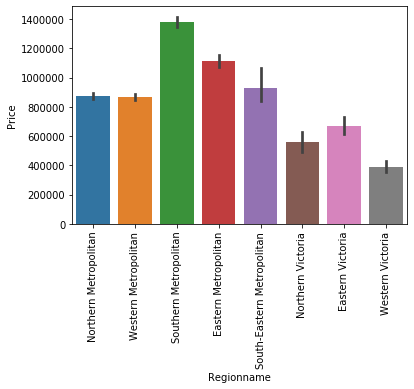

In [70]:
# menampilkan barplot nilai rata-rata harga setiap region

sns.barplot(x='Regionname', y='Price', data=df)
plt.xticks(rotation=90)


In [103]:
# Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!

df.loc[df['Regionname']=='Southern Metropolitan',['CouncilArea','Price']].sort_values(by='Price', ascending=False).groupby('CouncilArea').mean()['Price'].head()

CouncilArea
Bayside       1.701974e+06
Boroondara    1.743578e+06
Glen Eira     1.077048e+06
Kingston      9.573850e+05
Melbourne     9.671455e+05
Name: Price, dtype: float64

In [100]:
# Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
df.groupby('Type').mean()['Price'].sort_values(ascending=False)

# Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi adalah Type h (house,cottage,villa, semi,terrace) 

Type
h    1.273016e+06
t    8.841816e+05
u    5.883745e+05
Name: Price, dtype: float64

In [99]:
# Metode penjualan properti (Method) yang paling sering dilakukan!
df['Method'].value_counts().sort_values(ascending=False)

# metode penjualan properti (Method) yang paling sering dilakukan adalah S (property sold) sebanyak 3975 kali 

S     3957
SP     898
PI     757
VB     543
SA      41
Name: Method, dtype: int64

# 7. 

In [104]:
df.groupby(df['Regionname']).mean()['Price'].sort_values(ascending=False)


Regionname
Southern Metropolitan         1.378654e+06
Eastern Metropolitan          1.110341e+06
South-Eastern Metropolitan    9.304847e+05
Northern Metropolitan         8.722635e+05
Western Metropolitan          8.675011e+05
Eastern Victoria              6.699992e+05
Northern Victoria             5.568947e+05
Western Victoria              3.910714e+05
Name: Price, dtype: float64

In [106]:
# karena membandingkan lebih dari 2 group maka menggunakan Anova 1 arah

stats.f_oneway(
    df[df['Regionname']=='Southern Metropolitan']['Price'],
    df[df['Regionname']=='Eastern Metropolitan']['Price'],
    df[df['Regionname']=='South-Eastern Metropolitan']['Price'],
    df[df['Regionname']=='Northern Metropolitan']['Price'],
    df[df['Regionname']=='Western Metropolitan']['Price'],
    df[df['Regionname']=='Eastern Victoria']['Price'],
    df[df['Regionname']=='Northern Victoria']['Price'],
    df[df['Regionname']=='Western Victoria']['Price']
)

# p value < alpha(0.05) berarti tidak ada grup yang berbeda secara signifikan

F_onewayResult(statistic=127.12212574697818, pvalue=2.6136637617870606e-175)